In [44]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [46]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [47]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [48]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [49]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

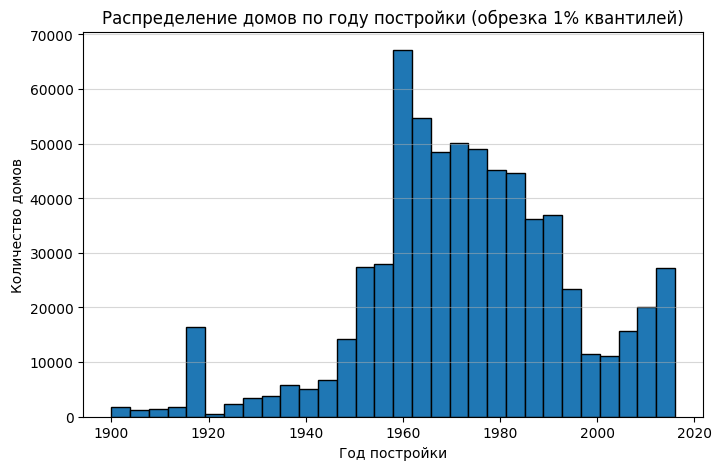

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [51]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


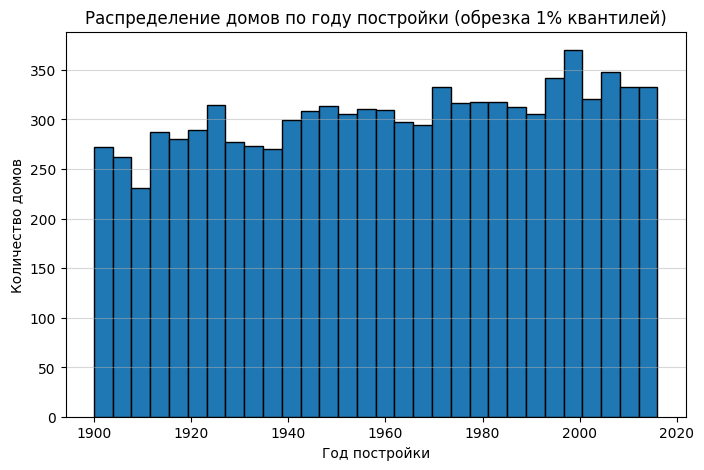

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [53]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [54]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [55]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [56]:
regions = [
    "Кабардино-Балкарская",
    "Карачаево-Черкесская",
    "Дагестан",
    "Ингушетия",
    "Северная Осетия - Алания",
    "Ставропольский",
    "Чеченская"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [57]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
26027,Дагестан,NaN,C,NaN
26028,Дагестан,NaN,C,NaN
26029,Дагестан,NaN,C,NaN
26030,Дагестан,NaN,F,751.2
26031,Дагестан,NaN,F,751.2
...,...,...,...,...
925180,Ставропольский,2016.0,B,1827.6
925181,Ставропольский,2016.0,B,1837.7
925182,Ставропольский,2008.0,C,2030.7
925183,Ставропольский,2016.0,B,1252.8


In [58]:
df_cut.isna().sum()

formalname_region        0
built_year           11979
energy_efficiency        0
area_total            4990
dtype: int64

In [59]:
df_cut_cleaned = df_cut.dropna()


In [60]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_13564\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [61]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
26084,Дагестан,2007.0,C,1407.3,1196.205
26085,Дагестан,2007.0,C,1407.3,1196.205
26086,Дагестан,2007.0,C,1407.3,1196.205
26087,Дагестан,2007.0,C,1407.3,1196.205
26088,Дагестан,2007.0,C,1407.3,1196.205
...,...,...,...,...,...
925180,Ставропольский,2016.0,B,1827.6,1279.320
925181,Ставропольский,2016.0,B,1837.7,1286.390
925182,Ставропольский,2008.0,C,2030.7,1726.095
925183,Ставропольский,2016.0,B,1252.8,876.960


In [62]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [63]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Дагестан,1864.0,C,1054.000
1,Дагестан,1889.0,E,1693.500
2,Дагестан,1890.0,C,242.250
3,Дагестан,1890.0,D,1427.000
4,Дагестан,1893.0,C,640.560
...,...,...,...,...
1893,Чеченская,2013.0,B++,3458.826
1894,Чеченская,2013.0,C,9668.070
1895,Чеченская,2015.0,C,6642.070
1896,Чеченская,2016.0,C,6818.870


In [64]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Дагестан,1864.0,1054.000,1.054000e+03
1,Дагестан,1889.0,1693.500,2.747500e+03
2,Дагестан,1890.0,1669.250,4.416750e+03
3,Дагестан,1893.0,640.560,5.057310e+03
4,Дагестан,1895.0,1220.685,6.277995e+03
...,...,...,...,...
584,Чеченская,2012.0,117320.375,5.301415e+06
585,Чеченская,2013.0,13126.896,5.314541e+06
586,Чеченская,2015.0,6642.070,5.321183e+06
587,Чеченская,2016.0,6818.870,5.328002e+06


In [65]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Дагестан,1864.0,1054.000,1054.000
1,Дагестан,1889.0,1693.500,2747.500
2,Дагестан,1890.0,1669.250,4416.750
3,Дагестан,1893.0,640.560,5057.310
4,Дагестан,1895.0,1220.685,6277.995


In [66]:
import pandas as pd

import pandas as pd

# данные
data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -3.20, -3.15, -3.09, -3.64, -3.79, -3.26, -3.14, -3.57, -3.27, -3.31,
        -3.50, -3.61, -3.26, -3.30, -3.10, -3.23, -3.67, -3.22, -3.35, -3.29,
        -3.28, -3.47, -3.19, -3.78, -3.20, -3.42, -3.67, -2.92, -2.99, -3.16,
        -2.46, -2.86, -2.89, -3.42, -2.87, -2.88, -2.47, -2.44, -2.83, -2.19,
        -2.49, -2.61, -2.08, -2.50, -2.14, -2.29, -2.00, -2.13, -2.19, -1.94,
        -2.02, -1.85, -2.02, -2.06, -1.80, -1.68, -1.62, -1.75, -1.61, -1.95,
        -1.49, -1.72, -0.97, -1.74, -1.89, -1.07, -1.20, -1.07, -1.15, -1.37,
        -0.99, -1.26, -1.19, -1.09, -1.38, -1.03, -1.07, -1.07, -0.96, -1.33,
        -0.49, -0.75, -1.06, -1.11, -0.91, -0.56, -1.24, -0.58, -0.50, -1.01,
        -0.38, -0.29, -0.61, -0.29, -0.08, -0.53, -0.17, -0.55, -0.76, -0.16,
        -0.77
    ]
}

df_ncfo_climate = pd.DataFrame(data_climate)
df_ncfo_climate

,Год,Зима
0,1960,-3.20
1,1961,-3.15
2,1962,-3.09
3,1963,-3.64
4,1964,-3.79
...,...,...
96,2056,-0.17
97,2057,-0.55
98,2058,-0.76
99,2059,-0.16


In [67]:

data_region_heat = {
    "Республика Дагестан": [
        1314.8, 1322.4, 1237.5, 1305.2, 1182.2, 1235, 1201.9, 503.9, 1200.6,
        1387.2, 990.3, 1243.3, 1205.6, 1206.7, 1276.8, 1260.1, 1012.80, 976.5,
        1212.9, 1241.42, 1293.04, 1236.41, 1270.1, 1327.7, 1284.5
    ],
    "Республика Ингушетия": [
        60, 32.6, 68.8, 107.7, 70.4, 66.9, 36.8, 1130.8, 906.7, 18.8, 27.5, 26.3,
        20.8, 24.8, 17.9, 14.2, 14.30, 12.6, 6.9, 4.85, 3.16, 4.79, 4.3, 3.7, 4.5
    ],
    "Кабардино-Балкарская Республика": [
        722.5, 787.7, 777.3, 812, 647.1, 713.2, 679.6, 592.7, 544.6, 665.2, 661.0,
        612.3, 634.1, 626.6, 629.4, 582.7, 493.00, 600, 615.5, 596.51, 594.98,
        597.49, 567.3, 587.7, 571.2
    ],
    "Карачаево-Черкесская Республика": [
        661.5, 563.8, 590.8, 612.2, 509.7, 545.3, 556.7, 562.7, 531.3, 496.9, 479.5,
        517.3, 493.2, 456.8, 467.1, 449.3, 532.00, 536.5, 545, 531.93, 554.87, 558.64,
        550.7, 552.6, 555.7
    ],
    "Республика Северная Осетия - Алания": [
        1053.6, 1242.2, 1221.9, 1167.1, 1091.7, 1159.3, 1131.5, 1112, 961.5, 1054.7,
        877.1, 896.2, 771.7, 871.9, 842.7, 836.4, 829.80, 794.5, 799.7, 832.3, 843.24,
        822.77, 813.1, 817.7, 901.3
    ],
    "Чеченская Республика": [
        0, 0, 0, 0, 0, 0, 56.2, 108.6, 314.9, 414.0, 579.8, 388.9, 419.6, 421.3, 389.5, 377.4,
        426.90, 380.3, 483.9, 654.83, 1547.90, 2370.83, 2406.6, 1999.3, 2010.7, 
    ],
    "Ставропольский край": [
        3271, 3151.8, 2872.3, 3133.3, 2929, 3305.7, 3386.5, 3308.3, 2292.8, 3183.6,
        3113.9, 3194.1, 3045.7, 3084.6, 3106.5, 3045.5, 3056.60, 2979, 2947.4, 2910.15,
        2855.61, 3010.88, 2899.8, 2964.5, 2940.9
    ]
}

years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Республика Дагестан,1314.8,1322.4,1237.5,1305.2,1182.2,1235.0,1201.9,503.9,1200.6,1387.2,...,1260.1,1012.8,976.5,1212.9,1241.42,1293.04,1236.41,1270.1,1327.7,1284.5
Республика Ингушетия,60.0,32.6,68.8,107.7,70.4,66.9,36.8,1130.8,906.7,18.8,...,14.2,14.3,12.6,6.9,4.85,3.16,4.79,4.3,3.7,4.5
Кабардино-Балкарская Республика,722.5,787.7,777.3,812.0,647.1,713.2,679.6,592.7,544.6,665.2,...,582.7,493.0,600.0,615.5,596.51,594.98,597.49,567.3,587.7,571.2
Карачаево-Черкесская Республика,661.5,563.8,590.8,612.2,509.7,545.3,556.7,562.7,531.3,496.9,...,449.3,532.0,536.5,545.0,531.93,554.87,558.64,550.7,552.6,555.7
Республика Северная Осетия - Алания,1053.6,1242.2,1221.9,1167.1,1091.7,1159.3,1131.5,1112.0,961.5,1054.7,...,836.4,829.8,794.5,799.7,832.30,843.24,822.77,813.1,817.7,901.3
Чеченская Республика,0.0,0.0,0.0,0.0,0.0,0.0,56.2,108.6,314.9,414.0,...,377.4,426.9,380.3,483.9,654.83,1547.90,2370.83,2406.6,1999.3,2010.7
Ставропольский край,3271.0,3151.8,2872.3,3133.3,2929.0,3305.7,3386.5,3308.3,2292.8,3183.6,...,3045.5,3056.6,2979.0,2947.4,2910.15,2855.61,3010.88,2899.8,2964.5,2940.9


In [68]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Дагестан,1864.0,1054.000,1.054000e+03
1,Дагестан,1889.0,1693.500,2.747500e+03
2,Дагестан,1890.0,1669.250,4.416750e+03
3,Дагестан,1893.0,640.560,5.057310e+03
4,Дагестан,1895.0,1220.685,6.277995e+03
...,...,...,...,...
584,Чеченская,2012.0,117320.375,5.301415e+06
585,Чеченская,2013.0,13126.896,5.314541e+06
586,Чеченская,2015.0,6642.070,5.321183e+06
587,Чеченская,2016.0,6818.870,5.328002e+06


In [69]:
import pandas as pd

# Убедимся, что годы имеют правильный тип
df_grouped['built_year'] = df_grouped['built_year'].astype(int)

# Создаем полную сетку
min_year = df_grouped['built_year'].min()
all_years = range(min_year, 2025)
all_regions = df_grouped['formalname_region'].unique()

full_index = pd.MultiIndex.from_product([all_regions, all_years], 
                                       names=['formalname_region', 'built_year'])

df_full = (df_grouped.set_index(['formalname_region', 'built_year'])
           .reindex(full_index)
           .reset_index()
           .sort_values(['formalname_region', 'built_year']))

# Заполняем данные
df_full['area_eff'] = df_full.groupby('formalname_region')['area_eff'].ffill().fillna(0)
df_full['area_eff_cumsum'] = df_full.groupby('formalname_region')['area_eff'].cumsum()

In [70]:
df_merged = df_full.merge(
    df_ncfo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [71]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Дагестан,1559,0.00,0.000000e+00,NaN
1,Дагестан,1560,0.00,0.000000e+00,NaN
2,Дагестан,1561,0.00,0.000000e+00,NaN
3,Дагестан,1562,0.00,0.000000e+00,NaN
4,Дагестан,1563,0.00,0.000000e+00,NaN
...,...,...,...,...,...
3257,Чеченская,2020,6818.87,5.445785e+06,-1.49
3258,Чеченская,2021,6818.87,5.452604e+06,-1.72
3259,Чеченская,2022,6818.87,5.459422e+06,-0.97
3260,Чеченская,2023,6818.87,5.466241e+06,-1.74


In [72]:
import re

def clean_region_name(name: str) -> str:
    # Спец. случай для Питера
    if re.sub(r"\s+", "", name.lower()) in ["г.санкт-петербург", "санкт-петербург"]:
        return "Санкт-Петербург"
    
    # Универсально убираем слова "Республика", "область", "край", "автономный округ", "авт. округ" и др.
    # как в начале, так и в конце строки
    name = re.sub(r"^(Республика|область|край|авт\.?\.?\s*округ)\s+", "", name, flags=re.IGNORECASE)
    name = re.sub(r"\s+(Республика|область|край|авт\.?\.?\s*округ)$", "", name, flags=re.IGNORECASE)
    
    # Чистим лишние пробелы
    name = " ".join(name.split())
    
    return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Дагестан,1559,0.00,0.000000e+00,NaN,NaN
1,Дагестан,1560,0.00,0.000000e+00,NaN,NaN
2,Дагестан,1561,0.00,0.000000e+00,NaN,NaN
3,Дагестан,1562,0.00,0.000000e+00,NaN,NaN
4,Дагестан,1563,0.00,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
3257,Чеченская,2020,6818.87,5.445785e+06,-1.49,1547.90
3258,Чеченская,2021,6818.87,5.452604e+06,-1.72,2370.83
3259,Чеченская,2022,6818.87,5.459422e+06,-0.97,2406.60
3260,Чеченская,2023,6818.87,5.466241e+06,-1.74,1999.30


In [73]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Дагестан,1559,0.00,0.000000e+00,NaN,NaN
1,Дагестан,1560,0.00,0.000000e+00,NaN,NaN
2,Дагестан,1561,0.00,0.000000e+00,NaN,NaN
3,Дагестан,1562,0.00,0.000000e+00,NaN,NaN
4,Дагестан,1563,0.00,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...
3257,Чеченская,2020,6818.87,5.445785e+06,-1.49,1547.90
3258,Чеченская,2021,6818.87,5.452604e+06,-1.72,2370.83
3259,Чеченская,2022,6818.87,5.459422e+06,-0.97,2406.60
3260,Чеченская,2023,6818.87,5.466241e+06,-1.74,1999.30


In [74]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


     built_year formalname_region  area_eff_cumsum  climate_winter
441        2000          Дагестан         0.246880        0.073171
442        2001          Дагестан         0.248243        0.000000
443        2002          Дагестан         0.249395        0.323171
444        2003          Дагестан         0.250317        0.067073
445        2004          Дагестан         0.251902        0.286585


In [75]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
441,Дагестан,2000,74594.2900,0.246880,0.073171,1314.80
442,Дагестан,2001,37012.6690,0.248243,0.000000,1322.40
443,Дагестан,2002,31298.4000,0.249395,0.323171,1237.50
444,Дагестан,2003,25024.6050,0.250317,0.067073,1305.20
445,Дагестан,2004,43075.0975,0.251902,0.286585,1182.20
...,...,...,...,...,...,...
3257,Чеченская,2020,6818.8700,0.191934,0.682927,1547.90
3258,Чеченская,2021,6818.8700,0.192185,0.542683,2370.83
3259,Чеченская,2022,6818.8700,0.192436,1.000000,2406.60
3260,Чеченская,2023,6818.8700,0.192687,0.530488,1999.30


Intercept: 6961.947364404555
Coef area_eff_cumsum: 1.9655924372492667e-05
Coef climate_winter: 429.2689847872316


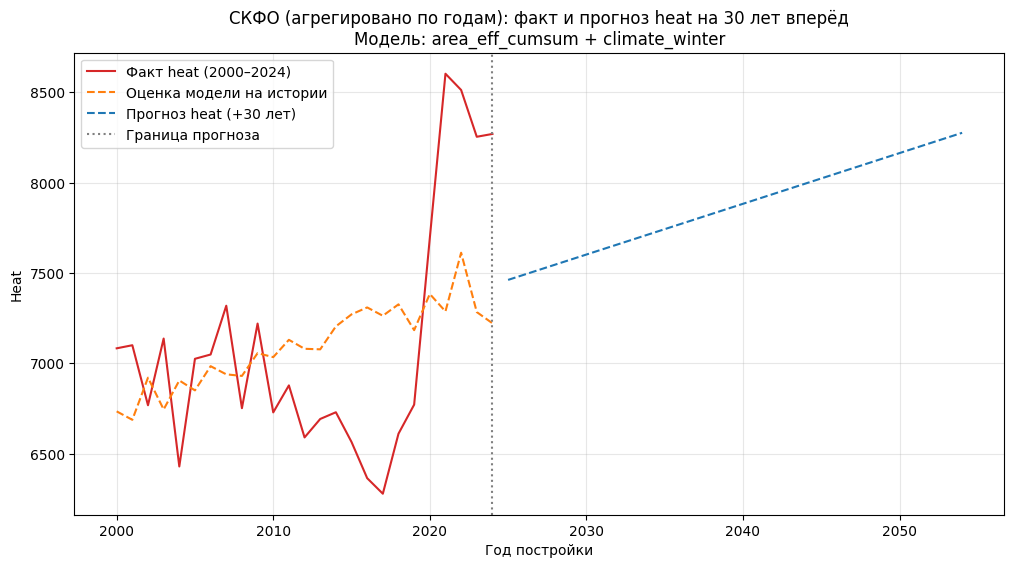

    built_year         heat  area_eff_cumsum  climate_winter    heat_pred  \
15        2015  6565.600000     5.241709e+07       -1.680000  7271.081737   
16        2016  6365.400000     5.306289e+07       -1.620000  7309.531672   
17        2017  6279.400000     5.355815e+07       -1.750000  7263.461509   
18        2018  6611.300000     5.371241e+07       -1.610000  7326.591345   
19        2019  6771.990000     5.387809e+07       -1.950000  7183.896507   
20        2020  7692.800000     5.400275e+07       -1.490000  7383.810609   
21        2021  8601.810000     5.412742e+07       -1.720000  7287.529112   
22        2022  8511.900000     5.425208e+07       -0.970000  7611.931220   
23        2023  8253.200000     5.437674e+07       -1.740000  7283.844471   
24        2024  8268.800000     5.450141e+07       -1.890000  7221.904493   
25        2025  7461.771854     5.691204e+07       -1.441600          NaN   
26        2026  7489.817382     5.749889e+07       -1.403138          NaN   

In [76]:
#СКФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("СКФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 6961.947364404555
Coef area_eff_cumsum: 1.9655924372492667e-05
Coef climate_winter: 429.2689847872316

Неверные знаки, применяем жёсткую регрессию...
Жёсткая модель:
Intercept: 36.76632693337979
Coef area_eff_cumsum: 0.00014326290023942336
Coef climate_winter: -4.840903793409717e-12
R2 жёсткой модели: -0.30833098605925247


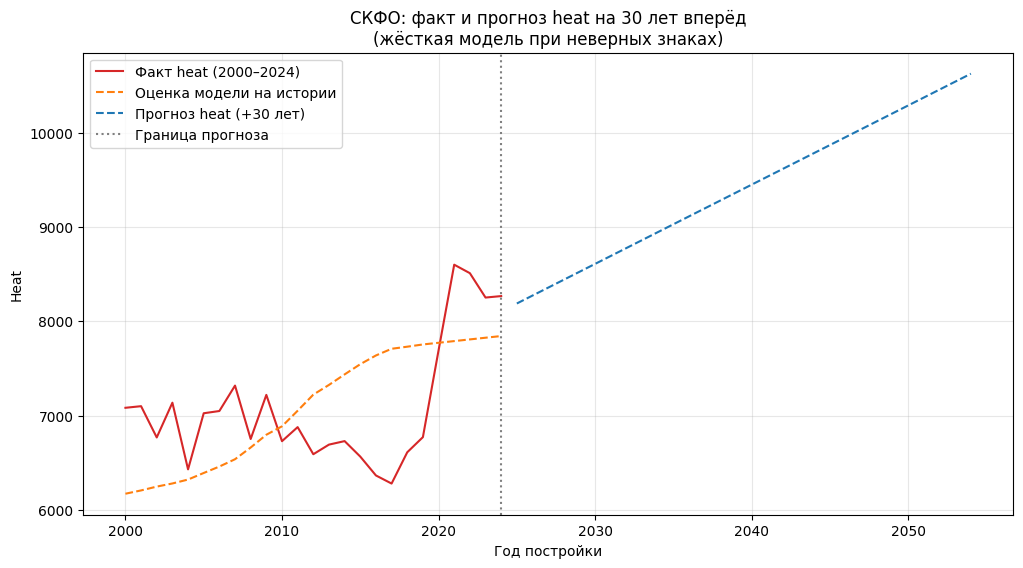

    built_year          heat    heat_pred     type
15        2015   6565.600000  7546.190004     Факт
16        2016   6365.400000  7638.709188     Факт
17        2017   6279.400000  7709.661658     Факт
18        2018   6611.300000  7731.761796     Факт
19        2019   6771.990000  7755.497762     Факт
20        2020   7692.800000  7773.357366     Факт
21        2021   8601.810000  7791.216970     Факт
22        2022   8511.900000  7809.076574     Факт
23        2023   8253.200000  7826.936178     Факт
24        2024   8268.800000  7844.795782     Факт
25        2025   8190.149538          NaN  Прогноз
26        2026   8274.224118          NaN  Прогноз
27        2027   8358.298698          NaN  Прогноз
28        2028   8442.373278          NaN  Прогноз
29        2029   8526.447858          NaN  Прогноз
30        2030   8610.522438          NaN  Прогноз
31        2031   8694.597017          NaN  Прогноз
32        2032   8778.671597          NaN  Прогноз
33        2033   8862.746177   

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("СКФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 7097.18
Coef area_eff_cumsum (std): 85.06724845758974
Coef climate_winter (std): 147.54708755340818


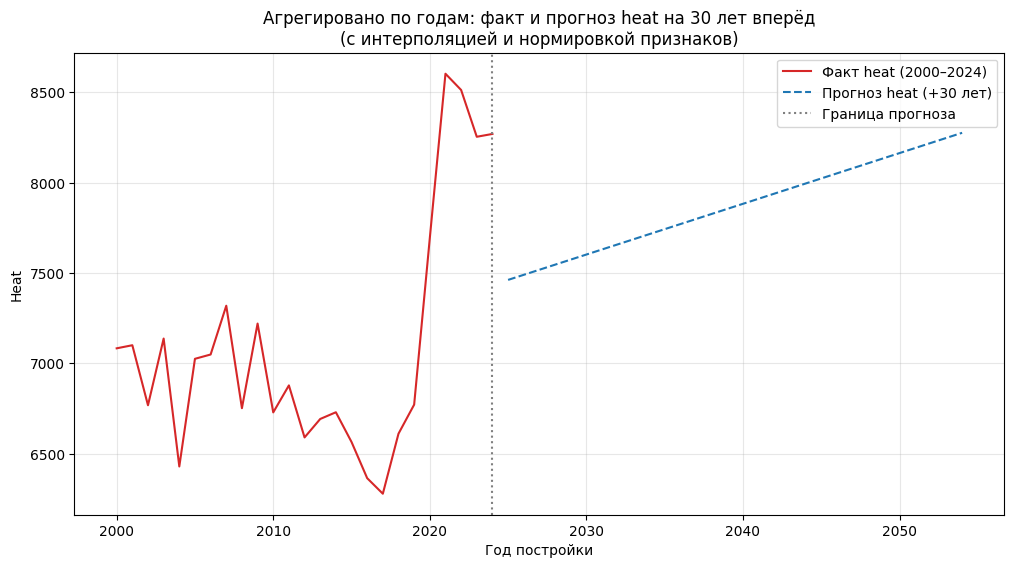

In [78]:
#СКФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2025)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.1157
Базовые коэффициенты: [ 85.06724846 147.54708755] Intercept: 7097.18
R2 жёсткой модели: 0.0979
Финальные коэффициенты с фиксированными знаками: [204.06779135   0.        ] Intercept: 7097.18


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


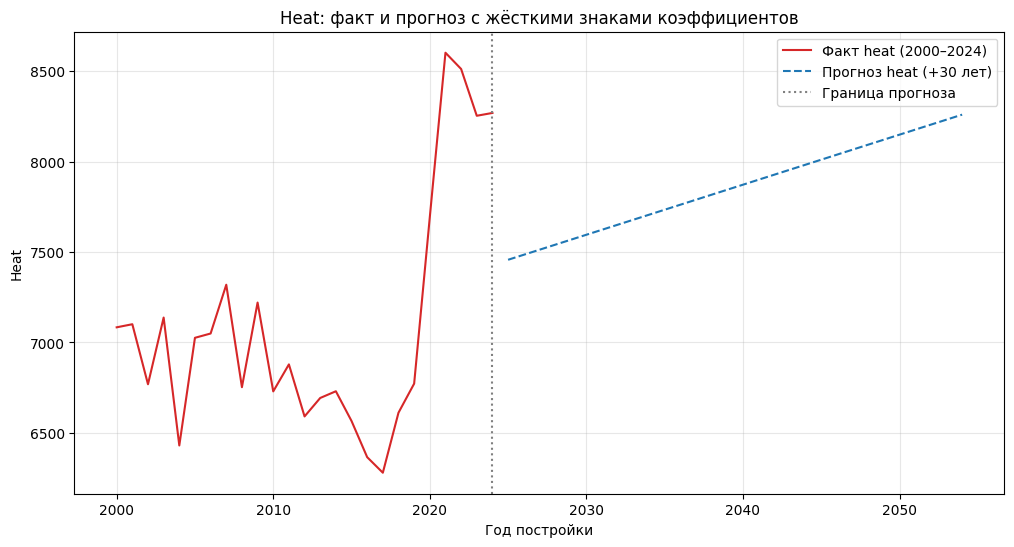

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

R2 базовой модели: 0.4293
Базовые коэффициенты: [-114.68733438  -78.78204939] Intercept: 6805.049499999999
R2 жёсткой модели: 0.3799
Финальные коэффициенты с фиксированными знаками: [   0.         -174.68398294] Intercept: 6805.049499999999

--- Метрики: Базовая модель ---
n=20, k=2
R²: 0.4293, Adjusted R²: 0.36210805637840504
RMSE: 214.06 (в тех же единицах, что и heat)
MAE:  160.58
MAPE: 2.37% (учтено 100.0% ненулевых наблюдений)
AIC: 220.6509833980556, BIC: 223.63818021871757

--- Кросс-валидация (Базовая модель) ---
CV RMSE (среднее): 224.47
CV MAE  (среднее): 182.64
CV R²   (среднее): -0.0153

--- Метрики: Жёсткая модель (фикс. знаки) ---
n=20, k=2
R²: 0.3799, Adjusted R²: 0.3069192354136895
RMSE: 223.13 (в тех же единицах, что и heat)
MAE:  166.07
MAPE: 2.44% (учтено 100.0% ненулевых наблюдений)
AIC: 222.31053608160738, BIC: 225.29773290226936

Коэффициенты базовой модели: [-114.68733438  -78.78204939] Intercept: 6805.049499999999
Коэффициенты с фиксированными знаками: [   0.    

C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


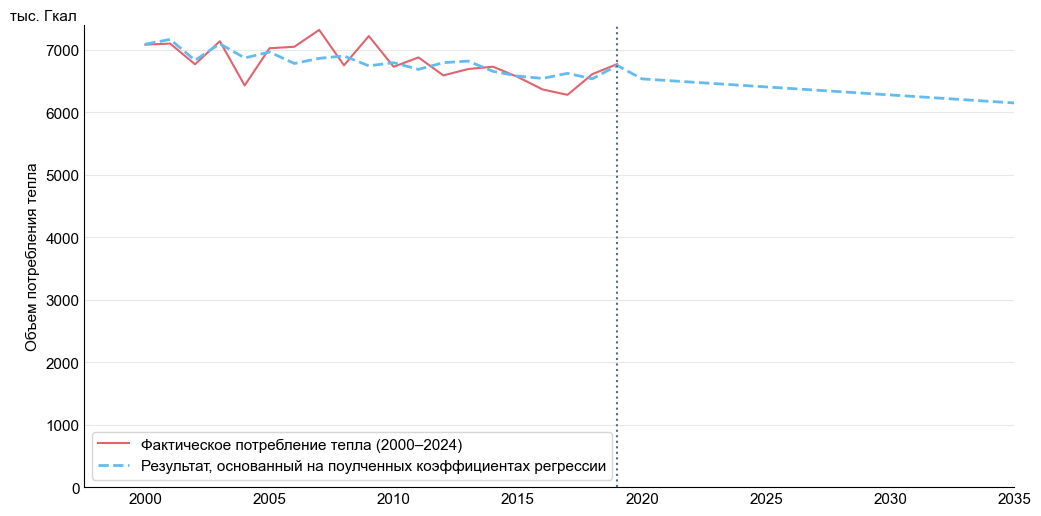

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2019)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

def adjusted_r2(r2, n, k):
    """Скорректированный R2. Возвращает np.nan, если нельзя посчитать."""
    if n <= k + 1:
        return np.nan
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def safe_mape(y_true, y_pred):
    """MAPE с защитой от нулевых y: считаем только для ненулевых наблюдений."""
    mask = y_true != 0
    if mask.sum() == 0:
        return np.nan, 0.0  # нет ненулевых значений
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    pct_zeros = 1.0 - mask.sum() / len(y_true)
    return mape, pct_zeros

def compute_regression_metrics(y_true, y_pred, X, model_name="Model"):
    n = len(y_true)
    k = X.shape[1]  # число признаков (без интерсепта)
    r2 = r2_score(y_true, y_pred)
    adj = adjusted_r2(r2, n, k)
    mse = mean_squared_error(y_true, y_pred)         # MSE
    rmse = np.sqrt(mse)                              # RMSE
    mae = mean_absolute_error(y_true, y_pred)
    mape, pct_zeros = safe_mape(y_true, y_pred)
    rss = np.sum((y_true - y_pred) ** 2)
    p = k + 1  # число параметров (включая intercept)
    # AIC / BIC (предположение о нормальности остатков)
    # формула: AIC = n * ln(RSS/n) + 2*p
    # BIC = n * ln(RSS/n) + ln(n) * p
    if rss <= 0:
        aic = np.nan
        bic = np.nan
    else:
        aic = n * np.log(rss / n) + 2 * p
        bic = n * np.log(rss / n) + np.log(n) * p

    out = {
        "model": model_name,
        "n": n, "k": k,
        "R2": r2, "Adjusted_R2": adj,
        "RMSE": rmse, "MAE": mae, "MAPE": mape, "Pct_zeros_in_y": pct_zeros,
        "RSS": rss, "AIC": aic, "BIC": bic
    }
    return out

def print_metrics(m):
    print(f"\n--- Метрики: {m['model']} ---")
    print(f"n={m['n']}, k={m['k']}")
    print(f"R²: {m['R2']:.4f}, Adjusted R²: {m['Adjusted_R2'] if not np.isnan(m['Adjusted_R2']) else 'NA'}")
    print(f"RMSE: {m['RMSE']:.2f} (в тех же единицах, что и heat)")
    print(f"MAE:  {m['MAE']:.2f}")
    if np.isnan(m['MAPE']):
        print("MAPE: NA (все значения y равны нулю или недостаточно ненулевых наблюдений)")
    else:
        print(f"MAPE: {m['MAPE']:.2f}% (учтено {100*(1-m['Pct_zeros_in_y']):.1f}% ненулевых наблюдений)")
    print(f"AIC: {m['AIC'] if not np.isnan(m['AIC']) else 'NA'}, BIC: {m['BIC'] if not np.isnan(m['BIC']) else 'NA'}")

# === Базовая модель (как у вас) ===
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
metrics_base = compute_regression_metrics(y, y_pred_base, X_scaled, model_name="Базовая модель")
print_metrics(metrics_base)

# --- Опционально: кросс-валидация (только для базовой модели sklearn) ---
n = len(y)
n_splits = min(5, n) if n >= 2 else 0
if n_splits >= 2:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    # отрицательные значения — потому что cross_val_score для MSE/MAE возвращает отрицательные
    cv_mse = -cross_val_score(LinearRegression(), X_scaled, y, scoring='neg_mean_squared_error', cv=kf)
    cv_rmse = np.sqrt(cv_mse).mean()
    cv_mae = -cross_val_score(LinearRegression(), X_scaled, y, scoring='neg_mean_absolute_error', cv=kf).mean()
    cv_r2 = cross_val_score(LinearRegression(), X_scaled, y, scoring='r2', cv=kf).mean()
    print("\n--- Кросс-валидация (Базовая модель) ---")
    print(f"CV RMSE (среднее): {cv_rmse:.2f}")
    print(f"CV MAE  (среднее): {cv_mae:.2f}")
    print(f"CV R²   (среднее): {cv_r2:.4f}")
else:
    print("\nНедостаточно наблюдений для кросс-валидации (n < 2)")

# === Жёсткая фиксация знаков (как у вас) ===
def mse_beta(beta, X, y):
    return np.mean((y - X @ beta) ** 2)

bounds = [(0, None), (None, 0)]
# начальное приближение — текущие коэффициенты (если они имеют подходящую длину)
x0 = reg.coef_.copy()
if x0.shape[0] != X_scaled.shape[1]:
    x0 = np.zeros(X_scaled.shape[1])

res = minimize(mse_beta, x0, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)

metrics_fixed = compute_regression_metrics(y, y_pred_fixed, X_scaled, model_name="Жёсткая модель (фикс. знаки)")
print_metrics(metrics_fixed)

# --- Печать коэффициентов ---
print("\nКоэффициенты базовой модели:", reg.coef_, "Intercept:", reg.intercept_)
print("Коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# Полный диапазон лет (включая прошлое и будущее)
all_years = np.arange(df_yearly["built_year"].min(), future_years[-1] + 1)
#hist = df_all[df_all["type"] == "Факт"]
#fut  = df_all[df_all["type"] == "Прогноз"]

# Тренды факторов (как и раньше)
area_all = area_trend(all_years)
clim_all = clim_trend(all_years)

# Масштабируем и прогнозируем
X_all_scaled = scaler.transform(pd.DataFrame({
    "area_eff_cumsum": area_all,
    "climate_winter": clim_all
}))
heat_all = intercept_fixed + X_all_scaled @ beta_fixed

# Сохраняем в датафрейм
df_all_forecast = pd.DataFrame({
    "built_year": all_years,
    "heat": heat_all
})

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Фактическое потребление тепла (2000–2024)", color="#E1636C")
# === Объединяем расчётные и прогнозные значения модели ===
combined_years = np.concatenate([df_yearly["built_year"].values, future_years])
combined_model_heat = np.concatenate([df_yearly["heat_pred"].values, future_heat])

# === Рисуем объединённую линию ===
plt.plot(
    combined_years,
    combined_model_heat,
    label="Результат, основанный на поулченных коэффициентах регрессии",
    color="#63BBF0",
    linewidth=2,
    linestyle="--"
)

plt.axvline(x=last_year, color="#576B82", linestyle=":")
plt.title("")
plt.xlabel("")
plt.ylabel("Объем потребления тепла")
plt.text(
    x=plt.xlim()[0] - 3,  # немного левее начала оси
    y=plt.ylim()[1] + 0.02*(plt.ylim()[1]-plt.ylim()[0]),  # чуть выше верхнего числа
    s="тыс. Гкал",
    ha="left", va="bottom", fontsize=11, fontfamily="Arial"
)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.legend()
plt.xlim(right=2035)
plt.ylim(bottom=0)
plt.grid(axis='y', alpha=0.3)
plt.tick_params(axis='both', length=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.rcParams['font.family'] = 'Arial'  # или 'DejaVu Sans', 'Calibri', 'Times New Roman'
plt.rcParams['font.size'] = 11               # размер
#plt.rcParams['font.weight'] = 'bold'         # толщина
plt.savefig("heat_forecast_ncfd.svg", format="svg", bbox_inches="tight")
plt.show()

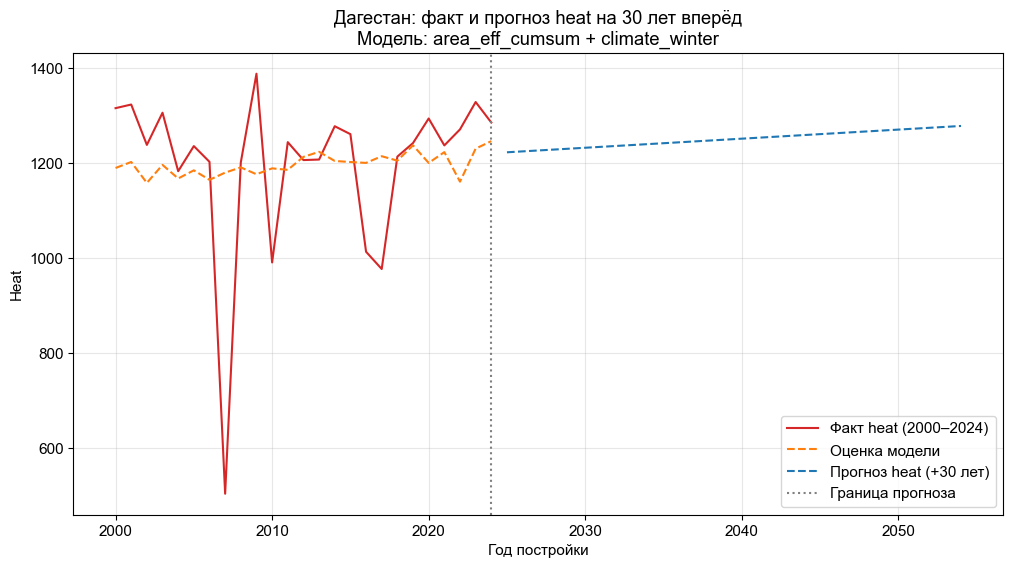

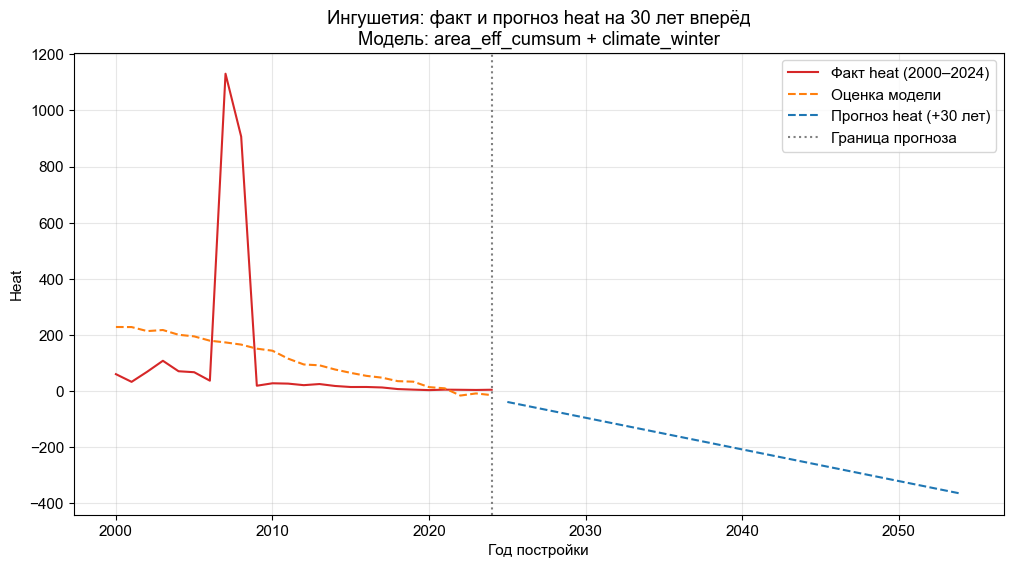

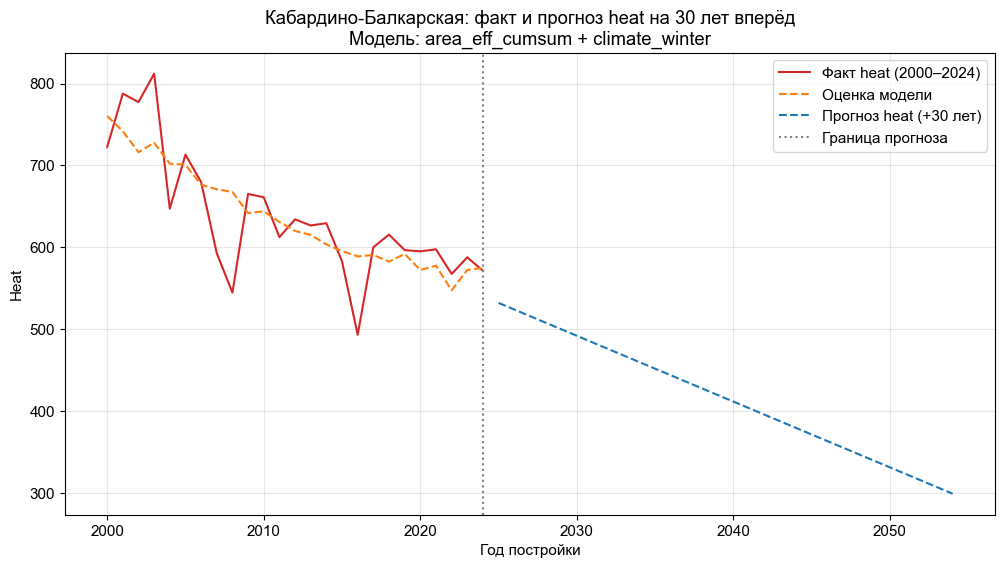

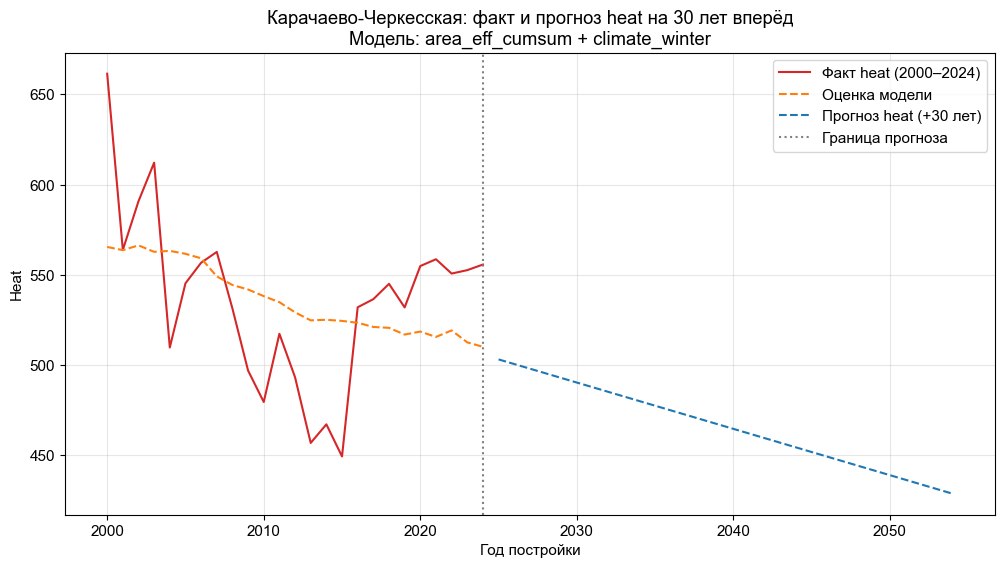

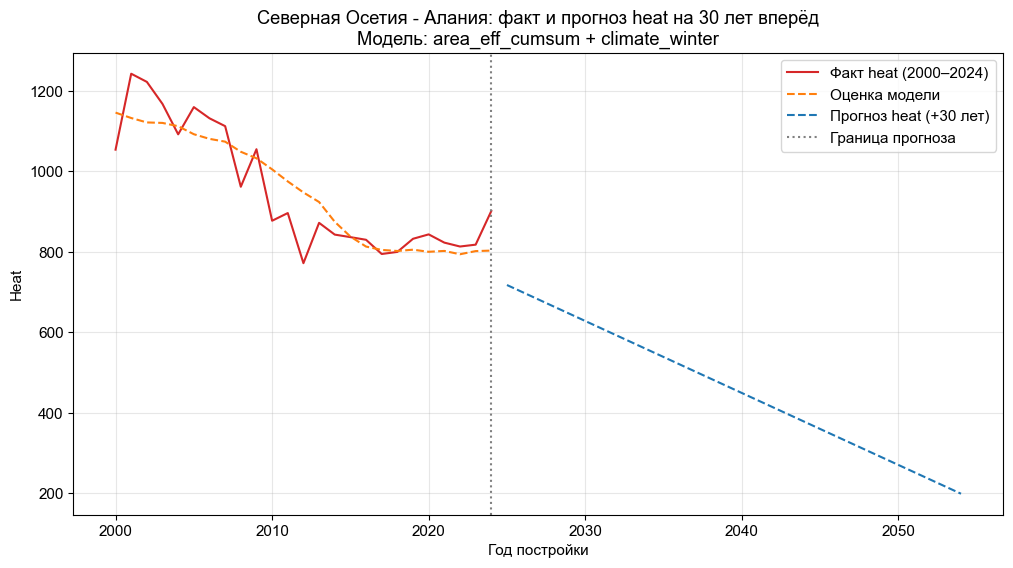

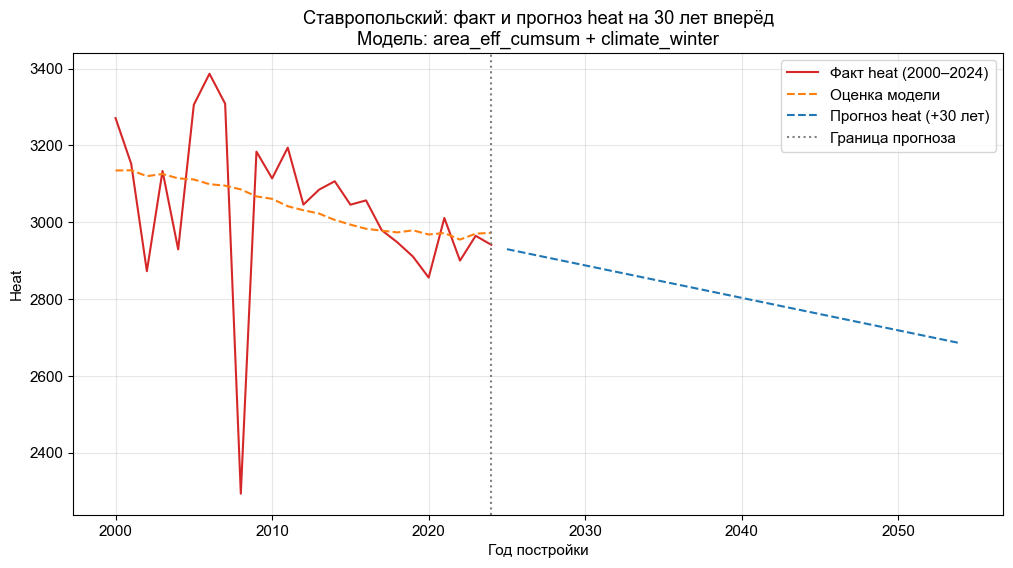

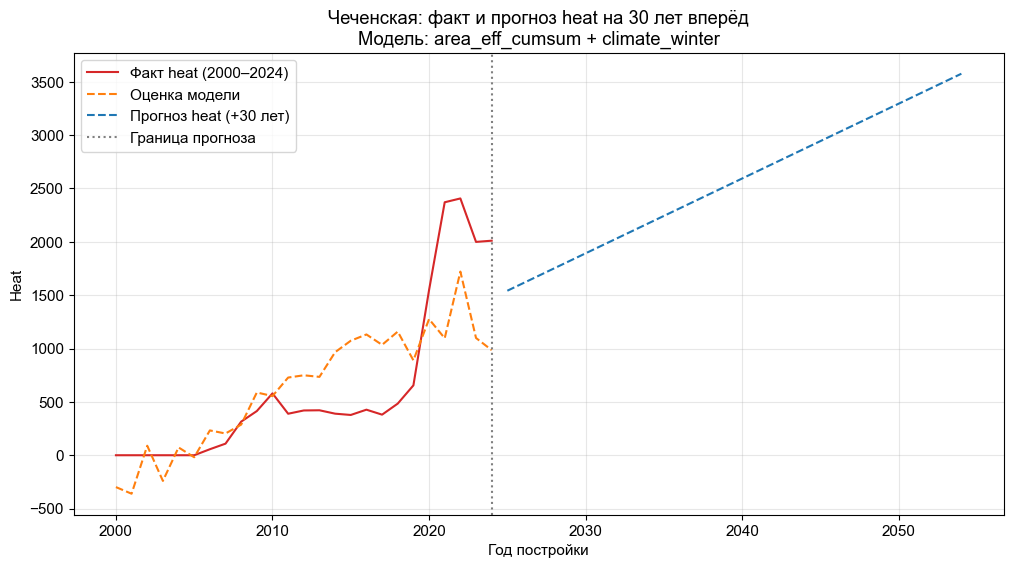

                     Регион    Intercept  Coef_area_eff_cumsum  \
0                  Дагестан   554.336787              0.000060   
1                 Ингушетия   511.781465             -0.001456   
2      Кабардино-Балкарская  3652.358128             -0.000724   
3      Карачаево-Черкесская  1357.353592             -0.000303   
4  Северная Осетия - Алания  2871.104958             -0.000386   
5            Ставропольский  3453.205577             -0.000019   
6                 Чеченская -4962.985465              0.001370   

   Coef_climate_winter        R2  
0           -86.548241  0.017686  
1           -21.908818  0.090524  
2           -36.222264  0.628027  
3             6.762888  0.167147  
4           -10.619078  0.785638  
5           -21.392142  0.089410  
6           820.390110  0.514007  


In [81]:
#СКФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


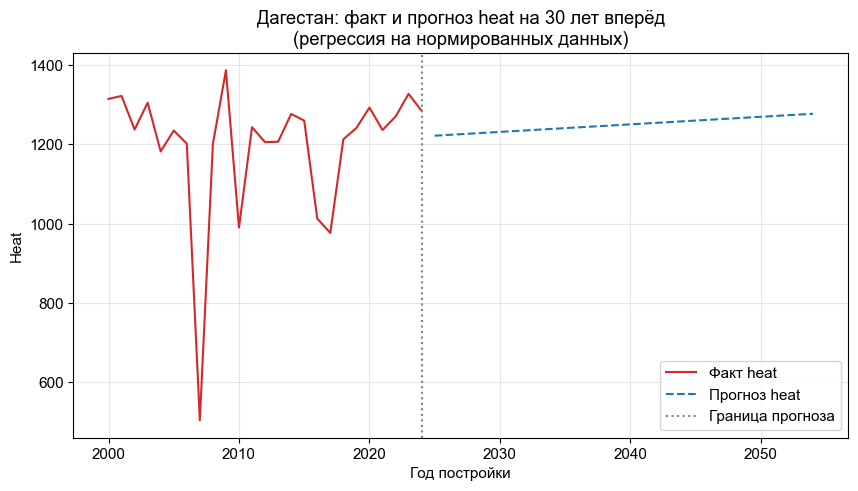

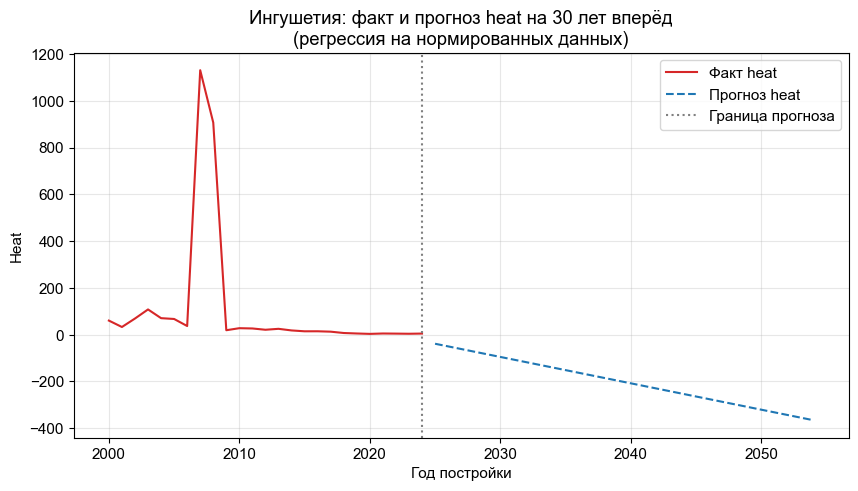

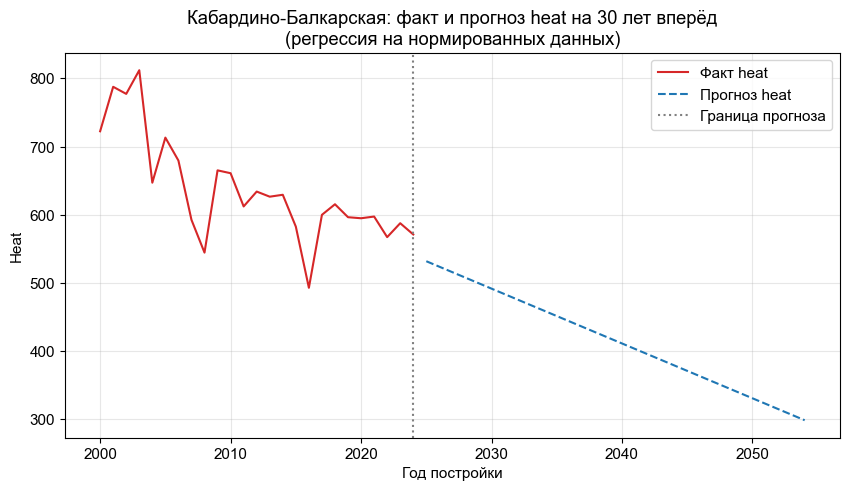

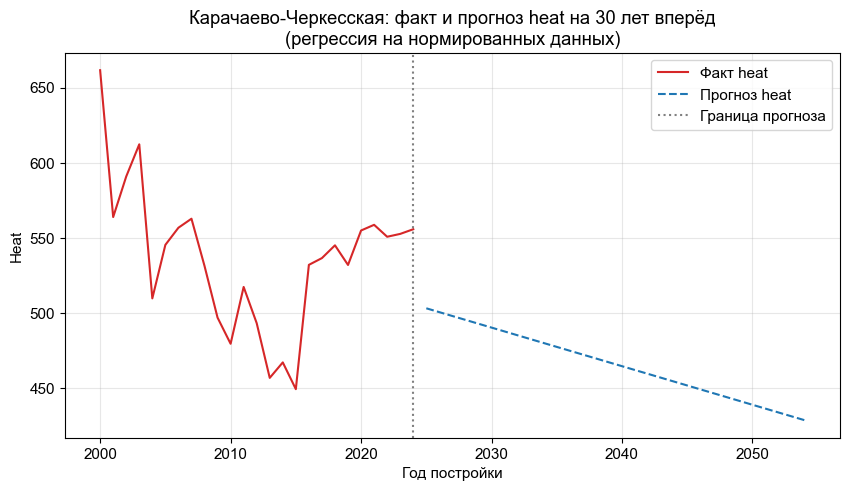

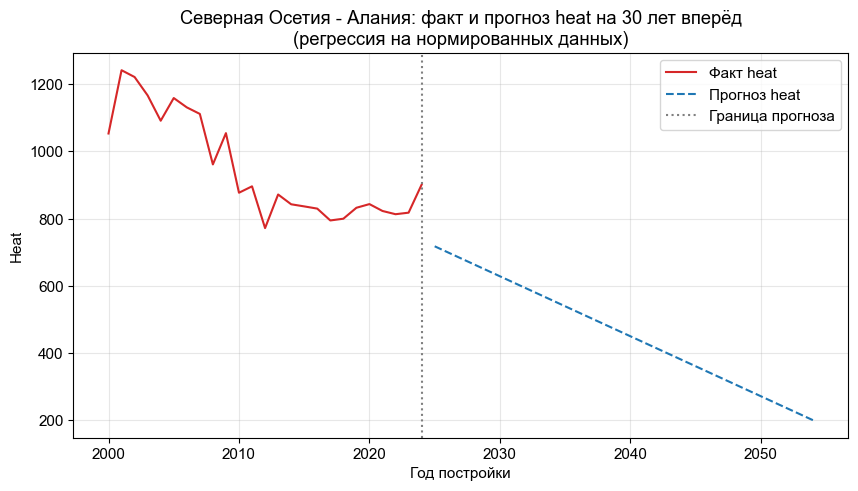

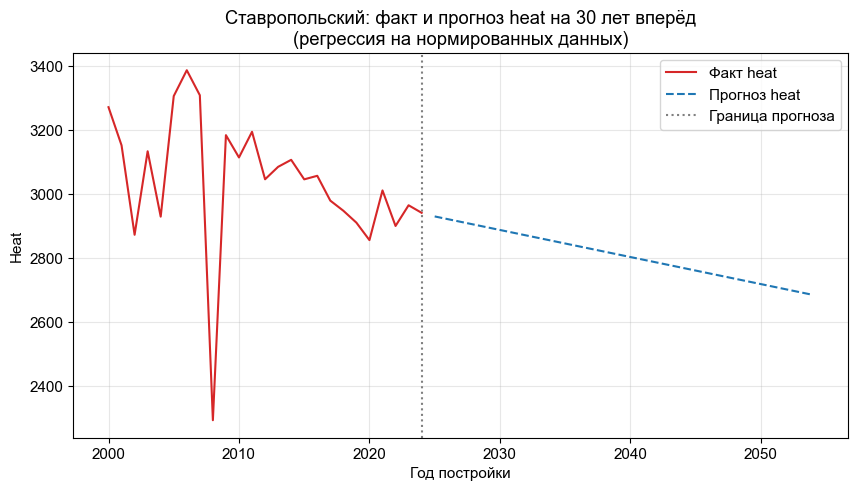

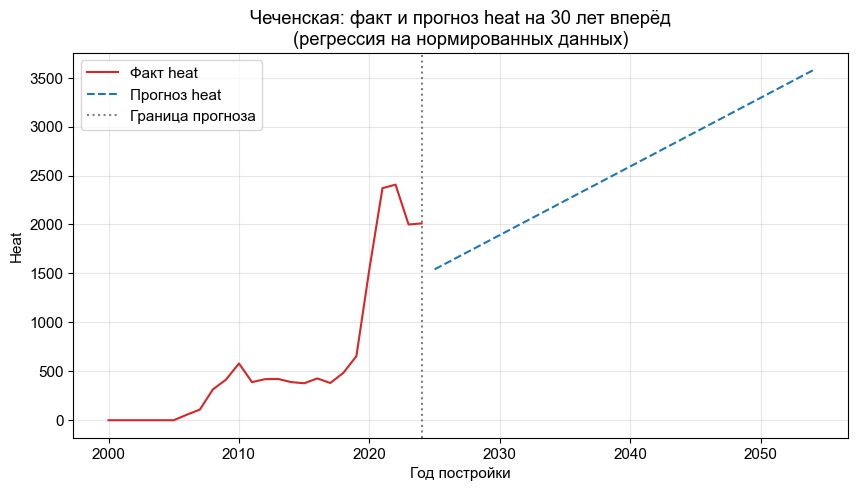

                     Регион  Intercept  Coef_area_eff_cumsum  \
0                  Дагестан  1197.1548             38.352669   
1                 Ингушетия   107.6040            -75.647397   
2      Кабардино-Балкарская   636.4672            -49.338765   
3      Карачаево-Черкесская   536.4816            -20.908421   
4  Северная Осетия - Алания   949.8364           -130.068271   
5            Ставропольский  3039.5776            -56.396214   
6                 Чеченская   630.0584            292.952233   

   Coef_climate_winter  R2 (на истории)  
0           -29.748110         0.017686  
1            -7.530435         0.090524  
2           -12.450211         0.628027  
3             2.324520         0.167147  
4            -3.649958         0.785638  
5            -7.352845         0.089410  
6           281.982104         0.514007  


In [82]:
#СКФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .agg({
                'heat': 'sum',
                'area_eff_cumsum': 'sum', 
                'climate_winter': 'mean'
            })
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
